Skewness Before Handling Skewness:
Skewness of Serial No. Before Skewness Handling: 0.552


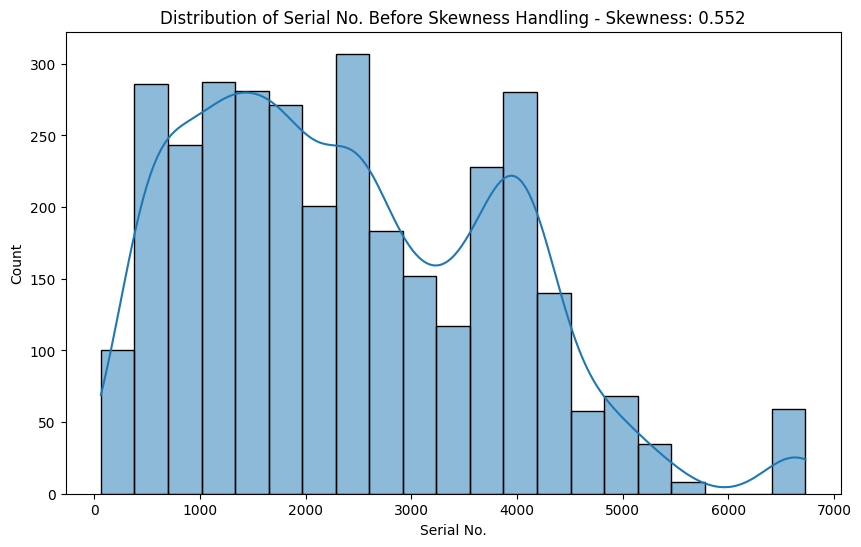

Skewness of leaf_moisture Before Skewness Handling: 1.469


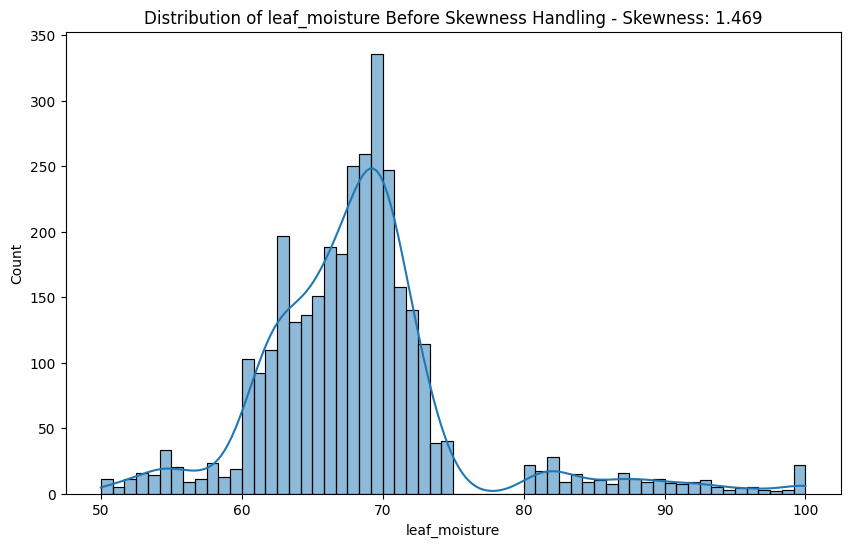

Skewness of leaf_temperature Before Skewness Handling: 0.979


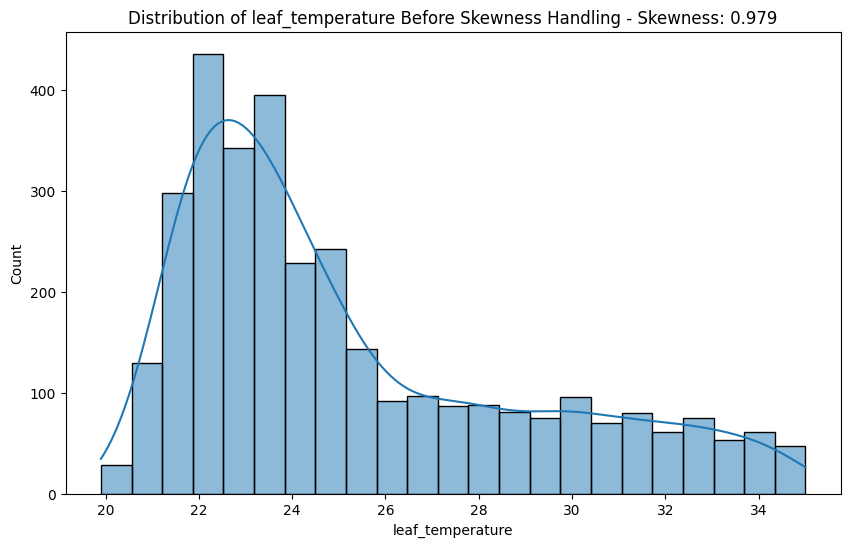

Applying PowerTransformer to leaf_moisture (Skewness: 1.469)
Skewness After Handling Skewness:
Skewness of Serial No. After Skewness Handling: 0.552


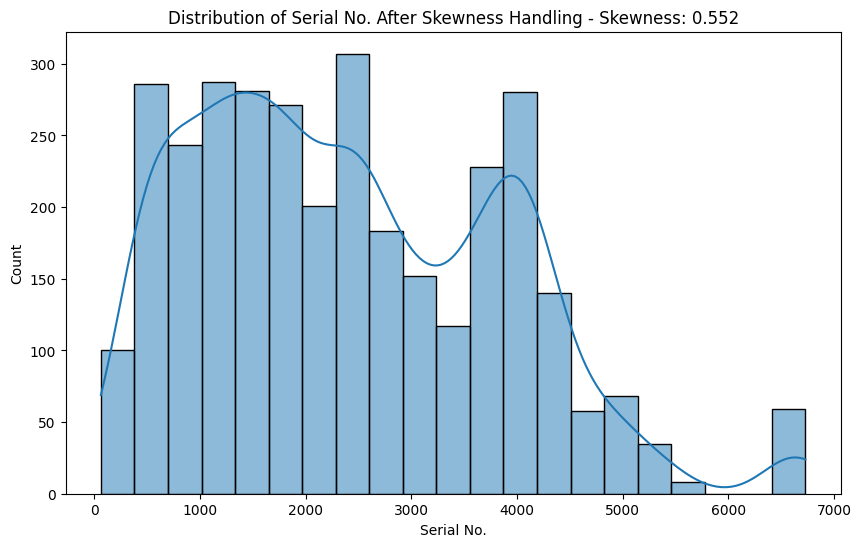

Skewness of leaf_moisture After Skewness Handling: -0.106


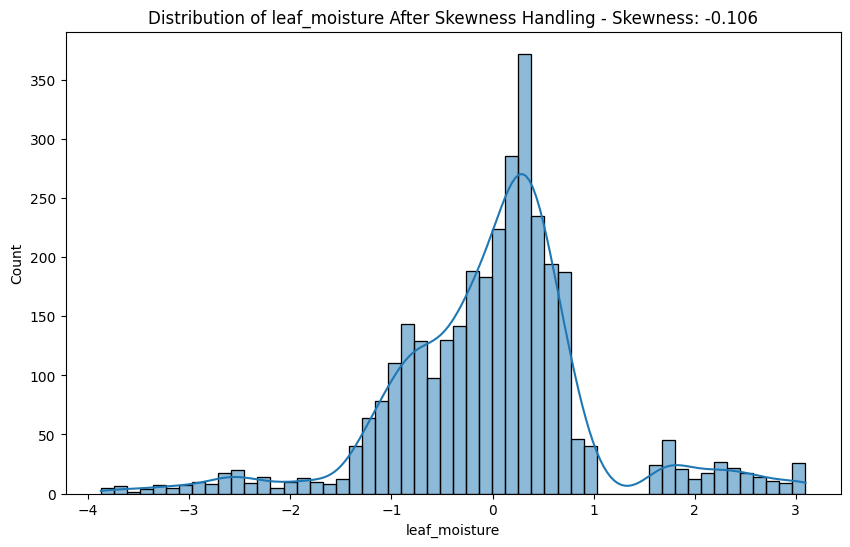

Skewness of leaf_temperature After Skewness Handling: 0.979


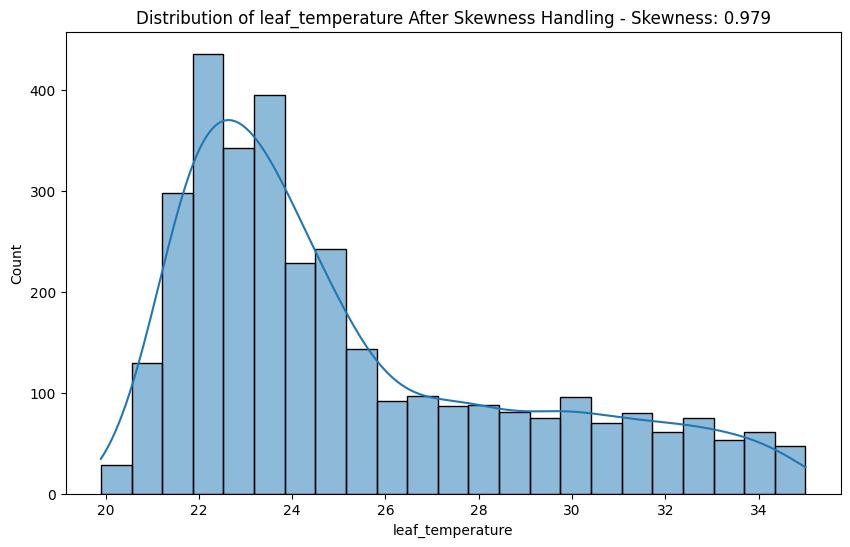

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

# Load the dataset
df = pd.read_csv('G:\\CAP_Guvi\\Leaf_Parameters_new.csv')

# Identify continuous numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Function to plot the distribution and calculate skewness
def plot_skewness(df, cols, title_suffix=""):
    for col in cols:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col].dropna(), kde=True)
        skewness = df[col].skew()
        plt.title(f'Distribution of {col} {title_suffix} - Skewness: {skewness:.3f}')
        print(f"Skewness of {col} {title_suffix}: {skewness:.3f}")
        plt.show()

# Plot original distributions and skewness
print("Skewness Before Handling Skewness:")
plot_skewness(df, numerical_cols, "Before Skewness Handling")

# Function to handle skewness using PowerTransformer
def handle_skewness(df, numerical_cols):
    pt = PowerTransformer(method='yeo-johnson', standardize=True)
    for col in numerical_cols:
        if col != 'selling_price':  # Avoid transforming target variable directly
            skewness = df[col].skew()
            if abs(skewness) > 1:  # Apply transformation only for highly skewed columns
                print(f"Applying PowerTransformer to {col} (Skewness: {skewness:.3f})")
                df[col] = pt.fit_transform(df[[col]])
    return df

# Handle skewness
df = handle_skewness(df, numerical_cols)

# Plot transformed distributions and skewness
print("Skewness After Handling Skewness:")
plot_skewness(df, numerical_cols, "After Skewness Handling")

# Save the modified dataset
output_path = 'G:\\CAP_Guvi\\Leaf_Parameters_new_skewhandl_one.csv'
df.to_csv(output_path, index=False)


In [ ]:
import pandas as pd

# Load the dataset
file_path = "G:\\CAP_Guvi\\Leaf_Parameters_SMOTEcatCrossEntro_New.csv"  
df = pd.read_csv(file_path)

# Remove duplicate rows based on the specified columns
df_unique = df.drop_duplicates(subset=['leaf_moisture', 'leaf_temperature', 'class'])

# Save the resultant DataFrame to a new CSV file
output_file_path = "G:\\CAP_Guvi\\Leaf_Parameters_removed_duplicates.csv"  
df_unique.to_csv(output_file_path, index=False)

print("Duplicate rows removed and resultant DataFrame saved to:", output_file_path)


Duplicate rows removed and resultant DataFrame saved to: G:\CAP_Guvi\Leaf_Parameters_removed_duplicates.csv


In [3]:
from imblearn.over_sampling import SMOTE
import pandas as pd
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv('G:\\CAP_Guvi\\Leaf_Parameters_catCrossEntro.csv')

# Split the data into features (X) and target (y)
X = df.drop(['class'], axis=1)
y = df['class']
# Define the sampling strategy
smote = SMOTE(sampling_strategy={'dew': 1888, 'irrigation': 1500, 'rainfall': 1350})

# Apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_resampled))

import pandas as pd

# Combine the resampled features and target into a single DataFrame
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)  # Use the original feature names
resampled_df['class'] = y_resampled  # Add the resampled target column

# Save the resampled DataFrame to a CSV file
resampled_csv_path = 'G:\\CAP_Guvi\\Leaf_Parameters_SMOTEcatCrossEntro_New.csv'
resampled_df.to_csv(resampled_csv_path, index=False)

print(f"Resampled dataset saved to: {resampled_csv_path}")


Class distribution after SMOTE: Counter({'dew': 1888, 'irrigation': 1500, 'rainfall': 1350})
Resampled dataset saved to: G:\CAP_Guvi\Leaf_Parameters_SMOTEcatCrossEntro_New.csv


In [5]:
import pandas as pd
df=pd.read_csv("G:\\CAP_Guvi\\Leaf_Parameters_SMOTEcatCrossEntro_New.csv")
df.head()

,leaf_moisture,leaf_temperature,class
0,61.3,22.1,dew
1,68.9,22.2,dew
2,82.4,22.1,rainfall
3,88.3,21.8,rainfall
4,91.5,22.0,rainfall


In [8]:
import pandas as pd

# Load the dataset
df=pd.read_csv("G:\\CAP_Guvi\\Leaf_Parameters_SMOTEcatCrossEntro_New.csv")


# Count the number of occurrences of each class
class_counts = df['class'].value_counts()

# Display the counts
print("Class Counts:")
print(class_counts)


Class Counts:
class
dew           1888
irrigation    1500
rainfall      1350
Name: count, dtype: int64


In [1]:
import pandas as pd

# Load the dataset
df=pd.read_csv("G:\\CAP_Guvi\\Leaf_Parameters_removed_duplicates.csv" )


# Count the number of occurrences of each class
class_counts = df['class'].value_counts()

# Display the counts
print("Class Counts:")
print(class_counts)


Class Counts:
class
rainfall      1307
irrigation    1267
dew           1146
Name: count, dtype: int64


Text(0.5, 1.0, 'Class Distribution After SMOTE')

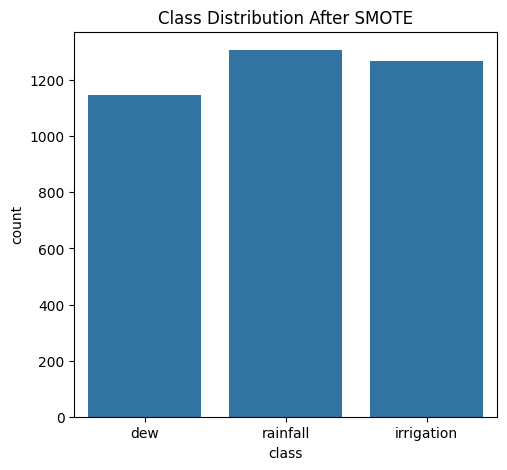

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load the original dataset
df = pd.read_csv("G:\\CAP_Guvi\\Leaf_Parameters_removed_duplicates.csv")

# Plot the class distribution before SMOTE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='class', data=df)
plt.title("Class Distribution After SMOTE")

In [2]:
import pandas as pd

# Load the dataset
df=pd.read_csv("G:\\CAP_Guvi\\Leaf_Parameters_removed_duplicates.csv")


# Count the number of occurrences of each class
class_counts = df['class'].value_counts()

# Display the counts
print("Class Counts:")
print(class_counts)


Class Counts:
class
rainfall      1307
irrigation    1267
dew           1146
Name: count, dtype: int64


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import pickle

# Load the dataset
df = pd.read_csv("G:\\CAP_Guvi\\Leaf_Parameters_removed_duplicates.csv")
X = df.drop('class', axis=1)
y = df['class']

# Splitting the dataset into training (80%), validation (10%), and testing (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initializing the StandardScaler
scaler = StandardScaler()

# Scaling the training data
X_train_scaled = scaler.fit_transform(X_train)

# Scaling the validation and test data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define file paths to save the scaled datasets
train_pickle_path = 'X_train_rem_dup.pkl'
val_pickle_path = 'X_val_rem_dup.pkl'
test_pickle_path = 'X_test_rem_dup.pkl'
y_train_pickle_path = 'y_train_rem_dup.pkl'
y_val_pickle_path = 'y_val_rem_dup.pkl'
y_test_pickle_path = 'y_test_rem_dup.pkl'

# Saving the scaled training, validation, and testing datasets
with open(train_pickle_path, 'wb') as f:
    pickle.dump(X_train_scaled, f)

with open(val_pickle_path, 'wb') as f:
    pickle.dump(X_val_scaled, f)

with open(test_pickle_path, 'wb') as f:
    pickle.dump(X_test_scaled, f)

# Saving the target variables for training, validation, and testing sets
with open(y_train_pickle_path, 'wb') as f:
    pickle.dump(y_train, f)

with open(y_val_pickle_path, 'wb') as f:
    pickle.dump(y_val, f)

with open(y_test_pickle_path, 'wb') as f:
    pickle.dump(y_test, f)

print("Training, validation, and testing datasets saved as pickle files.")


Training, validation, and testing datasets saved as pickle files.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import pickle

# Load the dataset
df = pd.read_csv("G:\\CAP_Guvi\\Leaf_Parameters_removed_duplicates.csv")
X = df.drop('class', axis=1)
y = df['class']

# Step 1: Balance the dataset using RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_balanced, y_balanced = oversampler.fit_resample(X, y)

# Step 2: Split the balanced dataset into training (80%), validation (10%), and testing (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Step 3: Initialize the StandardScaler
scaler = StandardScaler()

# Scale the training data
X_train_scaled = scaler.fit_transform(X_train)

# Scale the validation and test data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define file paths to save the scaled datasets
train_pickle_path = 'X_train_balanced.pkl'
val_pickle_path = 'X_val_balanced.pkl'
test_pickle_path = 'X_test_balanced.pkl'
y_train_pickle_path = 'y_train_balanced.pkl'
y_val_pickle_path = 'y_val_balanced.pkl'
y_test_pickle_path = 'y_test_balanced.pkl'

# Step 4: Save the scaled training, validation, and testing datasets
with open(train_pickle_path, 'wb') as f:
    pickle.dump(X_train_scaled, f)

with open(val_pickle_path, 'wb') as f:
    pickle.dump(X_val_scaled, f)

with open(test_pickle_path, 'wb') as f:
    pickle.dump(X_test_scaled, f)

# Save the target variables for training, validation, and testing sets
with open(y_train_pickle_path, 'wb') as f:
    pickle.dump(y_train, f)

with open(y_val_pickle_path, 'wb') as f:
    pickle.dump(y_val, f)

with open(y_test_pickle_path, 'wb') as f:
    pickle.dump(y_test, f)

print("Balanced training, validation, and testing datasets saved as pickle files.")

Balanced training, validation, and testing datasets saved as pickle files.


In [5]:
import pickle
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load datasets
with open('G:\\CAP_Guvi\\X_train_rem_dup.pkl', 'rb') as f:
    X_train_scaled = pickle.load(f)
with open('G:\\CAP_Guvi\\X_val_rem_dup.pkl', 'rb') as f:
    X_val_scaled = pickle.load(f)
with open('G:\\CAP_Guvi\\X_test_rem_dup.pkl', 'rb') as f:
    X_test_scaled = pickle.load(f)
with open('G:\\CAP_Guvi\\y_train_rem_dup.pkl', 'rb') as f:
    y_train = pickle.load(f)
with open('G:\\CAP_Guvi\\y_val_rem_dup.pkl', 'rb') as f:
    y_val = pickle.load(f)
with open('G:\\CAP_Guvi\\y_test_rem_dup.pkl', 'rb') as f:
    y_test = pickle.load(f)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Logistic Regression Model
logistic_model = LogisticRegression(max_iter=200, random_state=42)
logistic_model.fit(X_train_scaled, y_train_encoded)
logistic_predictions = logistic_model.predict(X_test_scaled)

# Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(max_depth=10, random_state=42)
decision_tree_model.fit(X_train_scaled, y_train_encoded)
decision_tree_predictions = decision_tree_model.predict(X_test_scaled)

# Evaluate Models
print("Logistic Regression Accuracy:", accuracy_score(y_test_encoded, logistic_predictions))
print("Logistic Regression Classification Report:\n", classification_report(y_test_encoded, logistic_predictions))

print("Decision Tree Accuracy:", accuracy_score(y_test_encoded, decision_tree_predictions))
print("Decision Tree Classification Report:\n", classification_report(y_test_encoded, decision_tree_predictions))


Logistic Regression Accuracy: 0.9838709677419355
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       112
           1       0.99      0.98      0.98       137
           2       1.00      0.98      0.99       123

    accuracy                           0.98       372
   macro avg       0.98      0.98      0.98       372
weighted avg       0.98      0.98      0.98       372

Decision Tree Accuracy: 1.0
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00       137
           2       1.00      1.00      1.00       123

    accuracy                           1.00       372
   macro avg       1.00      1.00      1.00       372
weighted avg       1.00      1.00      1.00       372



In [6]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logistic_model, X_train_scaled, y_train_encoded, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [1.         0.98991597 0.99495798 0.99831933 0.99327731]
Mean CV Accuracy: 0.9952941176470589


Epoch 1/200


g:\CAP_Guvi\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8254 - loss: 2.2222 - val_accuracy: 0.9866 - val_loss: 0.7543
Epoch 2/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9744 - loss: 0.6503 - val_accuracy: 0.9812 - val_loss: 0.3847
Epoch 3/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9777 - loss: 0.3832 - val_accuracy: 0.9866 - val_loss: 0.2985
Epoch 4/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9828 - loss: 0.3116 - val_accuracy: 0.9866 - val_loss: 0.2640
Epoch 5/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9805 - loss: 0.2817 - val_accuracy: 0.9866 - val_loss: 0.2482
Epoch 6/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9868 - loss: 0.2576 - val_accuracy: 0.9839 - val_loss: 0.2299
Epoch 7/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9809 - loss: 0.2479 - val_accuracy: 0.9866 - val_loss: 0.2152
Epoch 8/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9805 - loss: 0.2332 - val_accuracy: 0.9919 - val_loss: 0.2

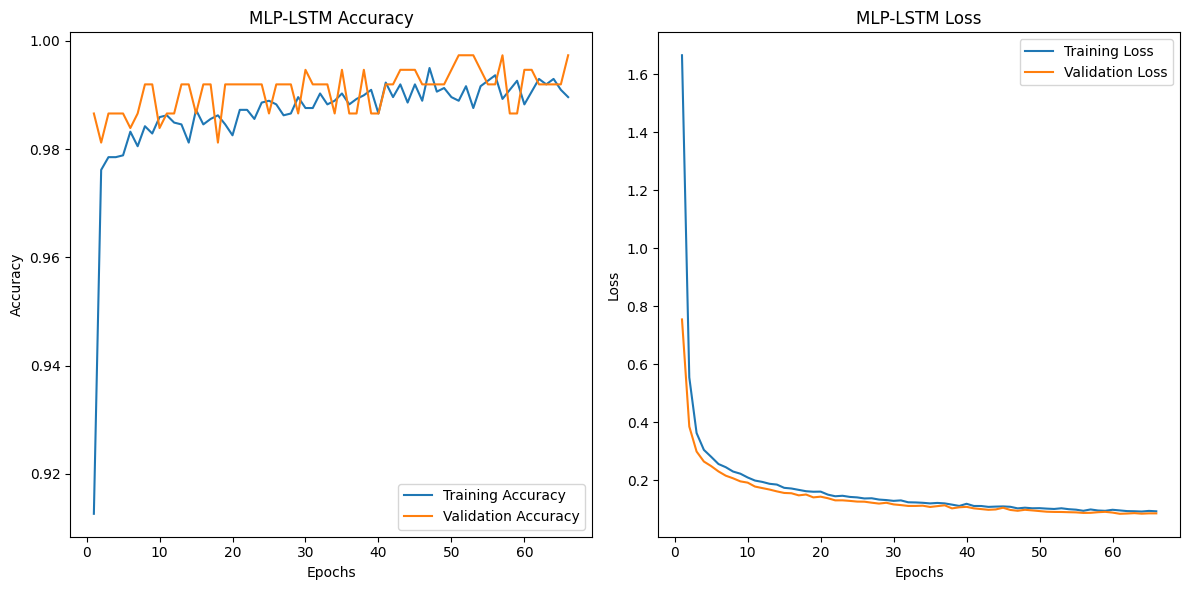

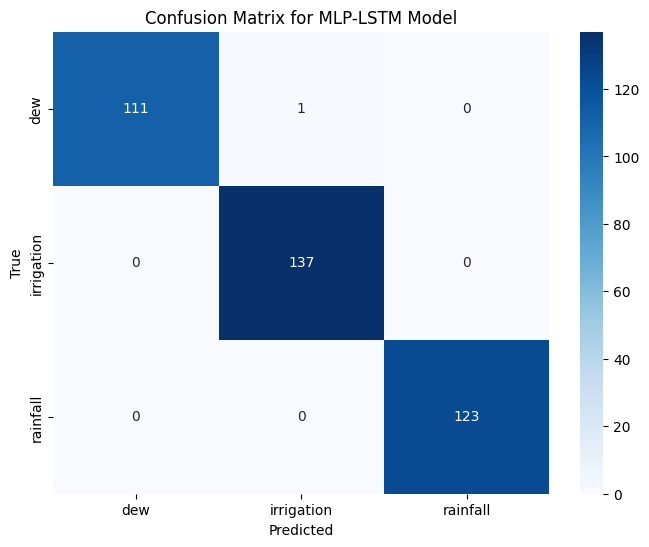

In [3]:
import pickle
import numpy as np
import xgboost as xgb
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt

# Load datasets
with open('G:\\CAP_Guvi\\X_train_rem_dup.pkl', 'rb') as f:
    X_train_scaled = pickle.load(f)
with open('G:\\CAP_Guvi\\X_val_rem_dup.pkl', 'rb') as f:
    X_val_scaled = pickle.load(f)
with open('G:\\CAP_Guvi\\X_test_rem_dup.pkl', 'rb') as f:
    X_test_scaled = pickle.load(f)
with open('G:\\CAP_Guvi\\y_train_rem_dup.pkl', 'rb') as f:
    y_train = pickle.load(f)
with open('G:\\CAP_Guvi\\y_val_rem_dup.pkl', 'rb') as f:
    y_val = pickle.load(f)
with open('G:\\CAP_Guvi\\y_test_rem_dup.pkl', 'rb') as f:
    y_test = pickle.load(f)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded_int = label_encoder.fit_transform(y_train)
y_val_encoded_int = label_encoder.transform(y_val)
y_test_encoded_int = label_encoder.transform(y_test)

y_train_encoded = keras.utils.to_categorical(y_train_encoded_int, num_classes=3)
y_val_encoded = keras.utils.to_categorical(y_val_encoded_int, num_classes=3)
y_test_encoded = keras.utils.to_categorical(y_test_encoded_int, num_classes=3)

# Define the MLP-LSTM model with regularization and dropout
def create_mlp_lstm_model(input_shape):
    model = models.Sequential([
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(input_shape,)),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.3),
        layers.Reshape((1, 64)),
        layers.LSTM(32, kernel_regularizer=regularizers.l2(0.01)),
        layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the MLP-LSTM model with early stopping
mlp_lstm_model = create_mlp_lstm_model(X_train_scaled.shape[1])
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = mlp_lstm_model.fit(
    X_train_scaled, y_train_encoded,
    epochs=200, batch_size=32,
    validation_data=(X_val_scaled, y_val_encoded),
    callbacks=[early_stopping]
)

# Predict with MLP-LSTM
mlp_lstm_predictions = np.argmax(mlp_lstm_model.predict(X_test_scaled), axis=1)





# Evaluate models



print("MLP-LSTM Model Accuracy:", accuracy_score(y_test_encoded_int, mlp_lstm_predictions))
print("MLP-LSTM Classification Report:\n", classification_report(y_test_encoded_int, mlp_lstm_predictions))


# Plot training and validation accuracy/loss for MLP-LSTM
def plot_metrics(history, title_prefix):
    epochs = range(1, len(history.history['accuracy']) + 1)
    plt.figure(figsize=(12, 6))
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title_prefix} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title_prefix} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_metrics(history, "MLP-LSTM")



import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Generate confusion matrix for MLP-LSTM predictions
labels = label_encoder.classes_  # Use original class names
plot_confusion_matrix(
    y_test_encoded_int, mlp_lstm_predictions, labels=labels, 
    title='Confusion Matrix for MLP-LSTM Model'
)




Epoch 1/200


g:\CAP_Guvi\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7474 - loss: 2.2070 - val_accuracy: 0.9796 - val_loss: 0.7444
Epoch 2/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9663 - loss: 0.6490 - val_accuracy: 0.9872 - val_loss: 0.3768
Epoch 3/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9694 - loss: 0.3919 - val_accuracy: 0.9898 - val_loss: 0.3022
Epoch 4/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9729 - loss: 0.3219 - val_accuracy: 0.9898 - val_loss: 0.2699
Epoch 5/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9711 - loss: 0.2951 - val_accuracy: 0.9872 - val_loss: 0.2498


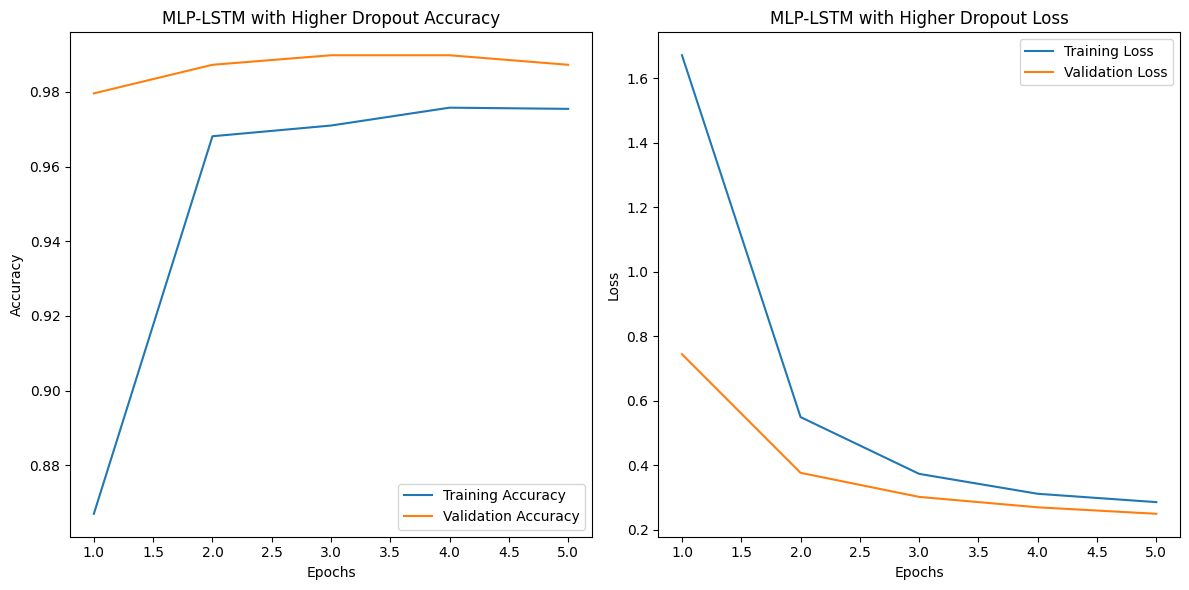

In [9]:
import pickle
import numpy as np
import xgboost as xgb
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# Load datasets
with open('G:\\CAP_Guvi\\X_train_balanced.pkl', 'rb') as f:
    X_train_scaled = pickle.load(f)
with open('G:\\CAP_Guvi\\X_val_balanced.pkl', 'rb') as f:
    X_val_scaled = pickle.load(f)
with open('G:\\CAP_Guvi\\X_test_balanced.pkl', 'rb') as f:
    X_test_scaled = pickle.load(f)
with open('G:\\CAP_Guvi\\y_train_balanced.pkl', 'rb') as f:
    y_train = pickle.load(f)
with open('G:\\CAP_Guvi\\y_val_balanced.pkl', 'rb') as f:
    y_val = pickle.load(f)
with open('G:\\CAP_Guvi\\y_test_balanced.pkl', 'rb') as f:
    y_test = pickle.load(f)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded_int = label_encoder.fit_transform(y_train)
y_val_encoded_int = label_encoder.transform(y_val)
y_test_encoded_int = label_encoder.transform(y_test)

y_train_encoded = keras.utils.to_categorical(y_train_encoded_int, num_classes=3)
y_val_encoded = keras.utils.to_categorical(y_val_encoded_int, num_classes=3)
y_test_encoded = keras.utils.to_categorical(y_test_encoded_int, num_classes=3)

def create_mlp_lstm_model_dropout(input_shape):
    model = models.Sequential([
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(input_shape,)),
        layers.Dropout(0.4),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.5),
        layers.Reshape((1, 64)),
        layers.LSTM(32, kernel_regularizer=regularizers.l2(0.01)),
        layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

mlp_lstm_model = create_mlp_lstm_model_dropout(X_train_scaled.shape[1])
history = mlp_lstm_model.fit(
    X_train_scaled, y_train_encoded,
    epochs=200, batch_size=32,
    validation_data=(X_val_scaled, y_val_encoded),
    callbacks=[early_stopping]
)

# Plot training and validation accuracy/loss for MLP-LSTM
def plot_metrics(history, title_prefix):
    epochs = range(1, len(history.history['accuracy']) + 1)
    plt.figure(figsize=(12, 6))
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title_prefix} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title_prefix} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_metrics(history, "MLP-LSTM with Higher Dropout")

#### consider this one


In [5]:
# Compute confusion matrix
cm = confusion_matrix(y_test_encoded_int, mlp_lstm_predictions)

# Calculate sensitivity (recall) for each class
sensitivity_per_class = cm.diagonal() / cm.sum(axis=1)

# Print sensitivity for each class
for i, sensitivity in enumerate(sensitivity_per_class):
    print(f"Sensitivity for class {labels[i]}: {sensitivity:.4f}")


Sensitivity for class dew: 0.9924
Sensitivity for class irrigation: 0.9924
Sensitivity for class rainfall: 1.0000


In [7]:
import pandas as pd
from scipy.stats import zscore

# Convert X_test_scaled to a Pandas DataFrame for better handling
X_test_df = pd.DataFrame(X_test_scaled)

# Compute Z-score for each feature
z_scores = X_test_df.apply(zscore)

# Display first few rows of the Z-score normalized dataset
print("Z-score normalized test dataset:")
print(z_scores.head())


Z-score normalized test dataset:
          0         1
0 -0.732224  2.419514
1  0.717994 -0.587481
2 -0.574054  1.146497
3  1.165810  1.092326
4  1.715619 -0.745857


In [5]:
from sklearn.metrics import fbeta_score

# Convert one-hot encoded predictions back to class labels
mlp_lstm_pred_probs = mlp_lstm_model.predict(X_test_scaled)
mlp_lstm_predictions = np.argmax(mlp_lstm_pred_probs, axis=1)  # Get predicted class labels

# Compute F2-score
f2_score = fbeta_score(y_test_encoded_int, mlp_lstm_predictions, beta=2, average='weighted')

print("MLP-LSTM F2-score:", f2_score)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
MLP-LSTM F2-score: 0.9795990941271336


Epoch 1/200


g:\CAP_Guvi\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7255 - loss: 1.7004 - val_accuracy: 0.9770 - val_loss: 0.8025
Epoch 2/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9628 - loss: 0.6981 - val_accuracy: 0.9821 - val_loss: 0.4371
Epoch 3/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9661 - loss: 0.4479 - val_accuracy: 0.9872 - val_loss: 0.3391
Epoch 4/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9733 - loss: 0.3623 - val_accuracy: 0.9872 - val_loss: 0.2962
Epoch 5/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9789 - loss: 0.3186 - val_accuracy: 0.9872 - val_loss: 0.2713
MLP-LSTM Model Accuracy: 0.9949109414758269
MLP-LSTM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       131
           1       0.98      1.00      0.99       131
           2       1.00      1.00      1.00       131

    accuracy                           0.99       393
   macro avg       0.99     

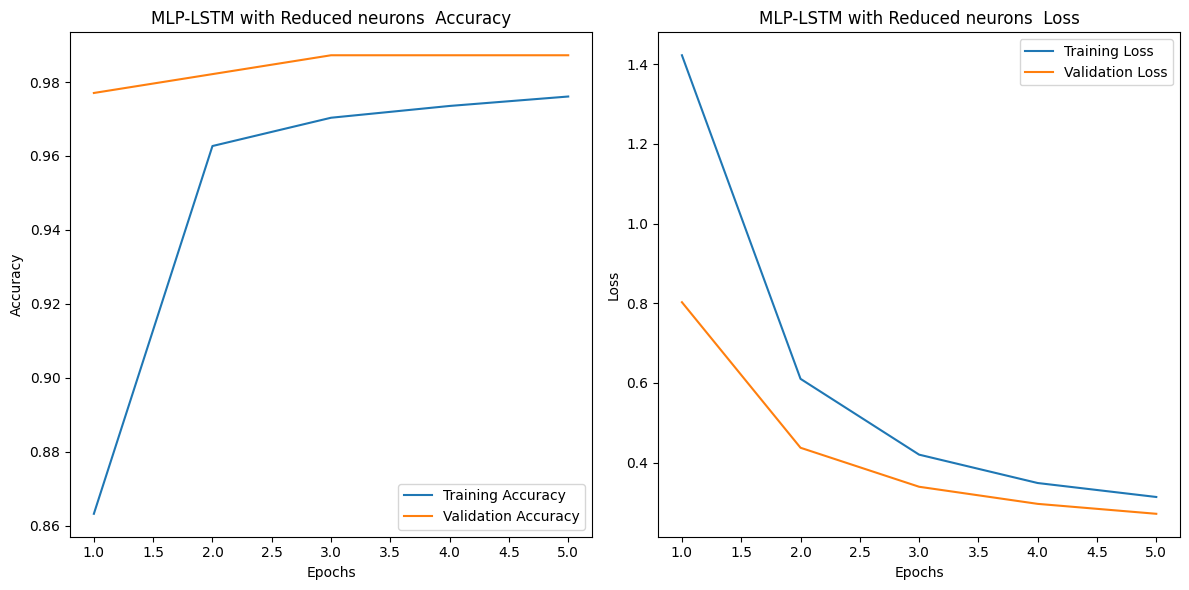

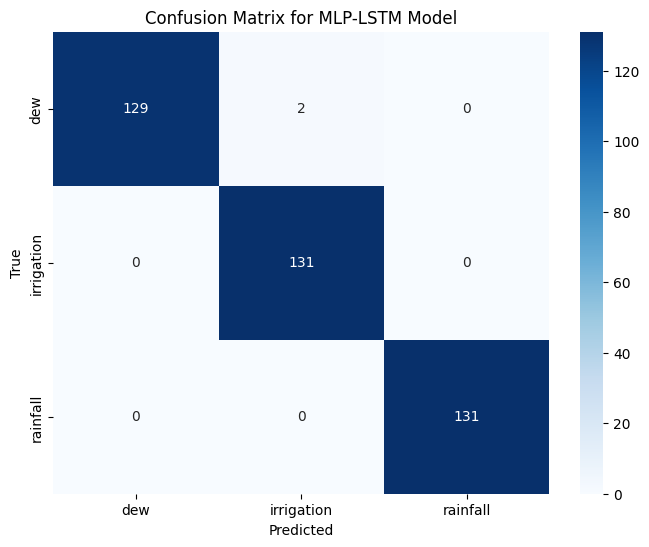

In [8]:
import pickle
import numpy as np
import xgboost as xgb
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# Load datasets
with open('G:\\CAP_Guvi\\X_train_balanced.pkl', 'rb') as f:
    X_train_scaled = pickle.load(f)
with open('G:\\CAP_Guvi\\X_val_balanced.pkl', 'rb') as f:
    X_val_scaled = pickle.load(f)
with open('G:\\CAP_Guvi\\X_test_balanced.pkl', 'rb') as f:
    X_test_scaled = pickle.load(f)
with open('G:\\CAP_Guvi\\y_train_balanced.pkl', 'rb') as f:
    y_train = pickle.load(f)
with open('G:\\CAP_Guvi\\y_val_balanced.pkl', 'rb') as f:
    y_val = pickle.load(f)
with open('G:\\CAP_Guvi\\y_test_balanced.pkl', 'rb') as f:
    y_test = pickle.load(f)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded_int = label_encoder.fit_transform(y_train)
y_val_encoded_int = label_encoder.transform(y_val)
y_test_encoded_int = label_encoder.transform(y_test)

y_train_encoded = keras.utils.to_categorical(y_train_encoded_int, num_classes=3)
y_val_encoded = keras.utils.to_categorical(y_val_encoded_int, num_classes=3)
y_test_encoded = keras.utils.to_categorical(y_test_encoded_int, num_classes=3)

def create_mlp_lstm_model_units(input_shape):
    model = models.Sequential([
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(input_shape,)),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.3),
        layers.Reshape((1, 32)),
        layers.LSTM(16, kernel_regularizer=regularizers.l2(0.01)),
        layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

mlp_lstm_model = create_mlp_lstm_model_units(X_train_scaled.shape[1])
history = mlp_lstm_model.fit(
    X_train_scaled, y_train_encoded,
    epochs=200, batch_size=32,
    validation_data=(X_val_scaled, y_val_encoded),
    callbacks=[early_stopping]
)

print("MLP-LSTM Model Accuracy:", accuracy_score(y_test_encoded_int, mlp_lstm_predictions))
print("MLP-LSTM Classification Report:\n", classification_report(y_test_encoded_int, mlp_lstm_predictions))


# Plot training and validation accuracy/loss for MLP-LSTM
def plot_metrics(history, title_prefix):
    epochs = range(1, len(history.history['accuracy']) + 1)
    plt.figure(figsize=(12, 6))
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title_prefix} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title_prefix} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_metrics(history, "MLP-LSTM with Reduced neurons ")


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Generate confusion matrix for MLP-LSTM predictions
labels = label_encoder.classes_  # Use original class names
plot_confusion_matrix(
    y_test_encoded_int, mlp_lstm_predictions, labels=labels, 
    title='Confusion Matrix for MLP-LSTM Model'
)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


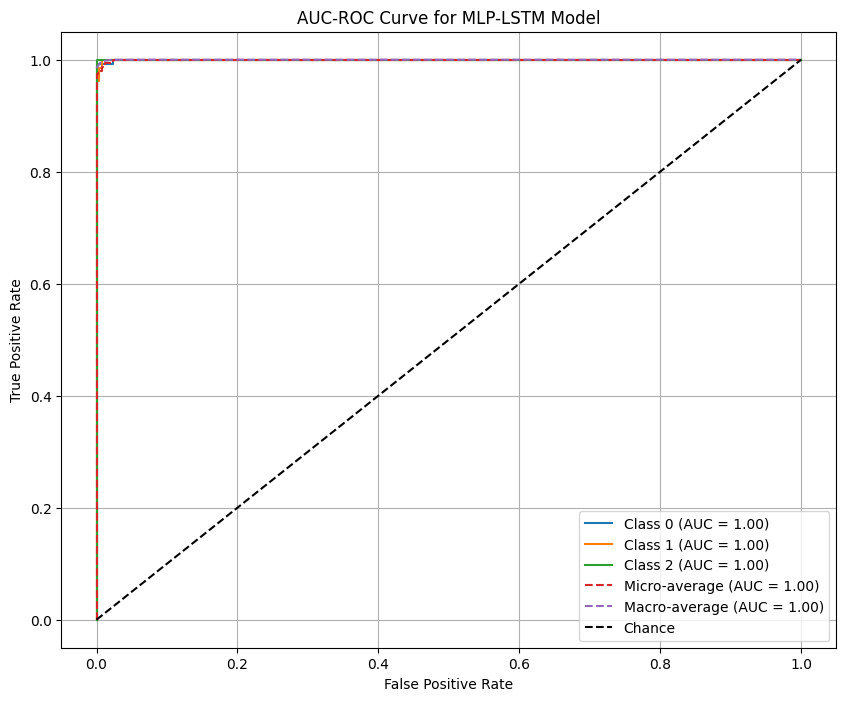

In [9]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the test labels for ROC calculation (required for multi-class ROC)
y_test_binarized = label_binarize(y_test_encoded_int, classes=range(3))

# Get the predicted probabilities for each class
mlp_lstm_probabilities = mlp_lstm_model.predict(X_test_scaled)

# Plot AUC-ROC Curve
def plot_auc_roc(y_true, y_prob, n_classes, title):
    plt.figure(figsize=(10, 8))
    fpr = {}
    tpr = {}
    roc_auc = {}
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    
    # Micro-average ROC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average (AUC = {roc_auc["micro"]:.2f})', linestyle='--')

    # Macro-average ROC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    roc_auc["macro"] = auc(all_fpr, mean_tpr)
    plt.plot(all_fpr, mean_tpr, label=f'Macro-average (AUC = {roc_auc["macro"]:.2f})', linestyle='--')
    
    plt.plot([0, 1], [0, 1], 'k--', label='Chance')
    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Call the function to plot the AUC-ROC curve
plot_auc_roc(y_test_binarized, mlp_lstm_probabilities, n_classes=3, title='AUC-ROC Curve for MLP-LSTM Model')


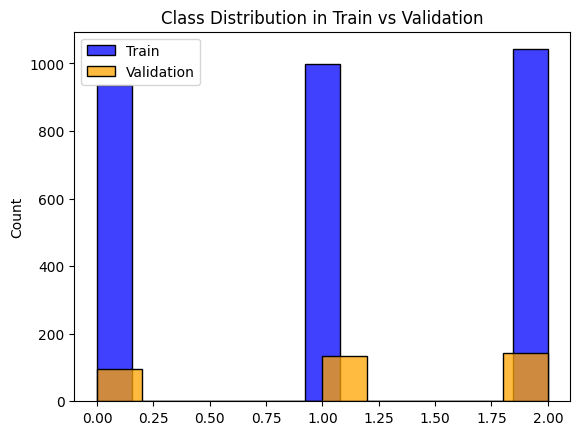

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distributions
sns.histplot(y_train_encoded_int, kde=False, label="Train", color="blue")
sns.histplot(y_val_encoded_int, kde=False, label="Validation", color="orange")
plt.legend()
plt.title("Class Distribution in Train vs Validation")
plt.show()

# Proceed to train only after verifying similar distributions.
